# Overview

This notebook implements fourier series simualtions.

# Dependencies

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# 1.3: Periodicity: Definitions, Examples, and Things to Come

A function $f(t)$ is said to be period of period $t$ if there exists a number $T > 0$ such that $\forall t$ $f(t + T) = f(t)$.

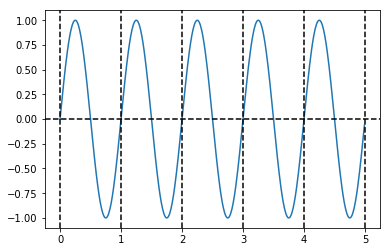

In [2]:
# Example: The basic trigonometric functions are periodic.

def period_one_sine(x):
    return np.sin(2*np.pi*x)

arange = np.arange(0, 5, 0.01)
sin_out = period_one_sine(arange)

plt.figsize=(20, 4)
plt.plot(arange, sin_out)
plt.axhline(y=0, linestyle='--', color='black')
for i in range(0, 6):
    plt.axvline(x=i, linestyle='--', color='black')

Note that the sine function above has period one. For a general sinosoid of the form $f(t) = sin(\omega t + \phi)$ the period is given by $\frac{\omega}{2\pi}$. Note $\phi$ is a phase shift.

## Combining sinosoids

Note that summing sinosoids leads to a periodic function with a period that is the maximum period of all of the sinosoids being summed.

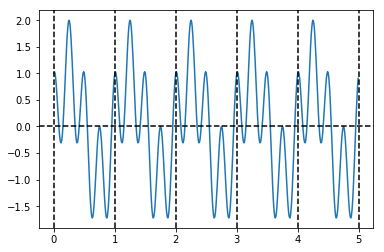

In [3]:
def sinosoid(x):
    return np.sin(2*np.pi*x) + np.cos(4*2*np.pi*x)

sin_out = sinosoid(arange)

plt.figsize=(20, 4)
plt.plot(arange, sin_out)
plt.axhline(y=0, linestyle='--', color='black')
for i in range(0, 6):
    plt.axvline(x=i, linestyle='--', color='black')

Note that that combination of sinosoids can be arbitrarily complex and the above statement still holds.

## Aperiodic sinosoids

Sinusoids are only periodic if the ratio of the periods being combined is a raional number.

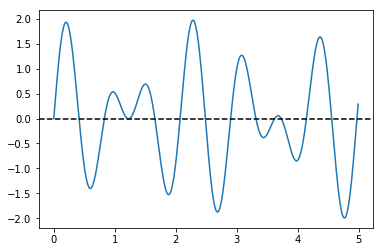

In [4]:
def sinosoid(x):
    return np.sin(2*np.pi*x) + np.sin(np.sqrt(2)*2*np.pi*x)

sin_out = sinosoid(arange)

plt.figsize=(20, 4)
plt.plot(arange, sin_out)
plt.axhline(y=0, linestyle='--', color='black')

# Audio

We can "hear" the audio interpretation of sinosoids, since fundamentally sound is simply waves passing through air.

In [5]:
from IPython.display import Audio

In [6]:
sr = 22050 # sample rate

In [7]:
concert_a = lambda x: np.cos(2*np.pi*440*x)

In [8]:
sin_out = concert_a(np.arange(0, 4, 0.0001))

In [9]:
len(sin_out)

40000

In [10]:
Audio(sin_out, rate=sr)

# Fourier coefficients

Let's use the theory of fourier series to approximate a few periodic functions. We'll start with the switch function.

In [11]:
from scipy.integrate import quad
from numba import vectorize, float64
from numpy import pi

In [37]:
def fourier_series(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

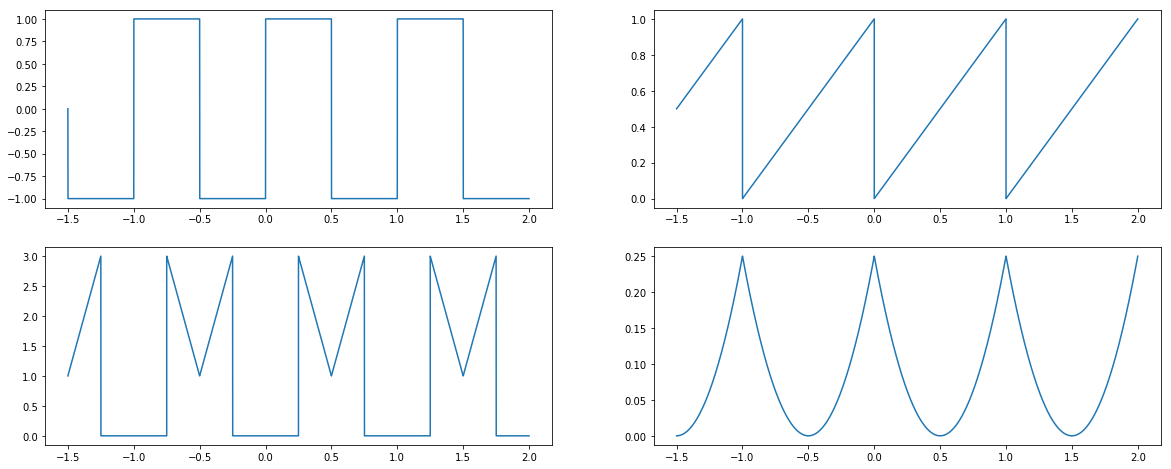

In [46]:
Fs = 10000
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
func2 = lambda t: t % 1
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25)
func4 = lambda t: ((t%1)-0.5)**2
t = np.arange(-1.5, 2, 1/Fs)

plt.figure(figsize=(20, 8))
plt.subplot(221); plt.plot(t, func1(t))
plt.subplot(222); plt.plot(t, func2(t))
plt.subplot(223); plt.plot(t, func3(t))
plt.subplot(224); plt.plot(t, func4(t))

<StemContainer object of 3 artists>

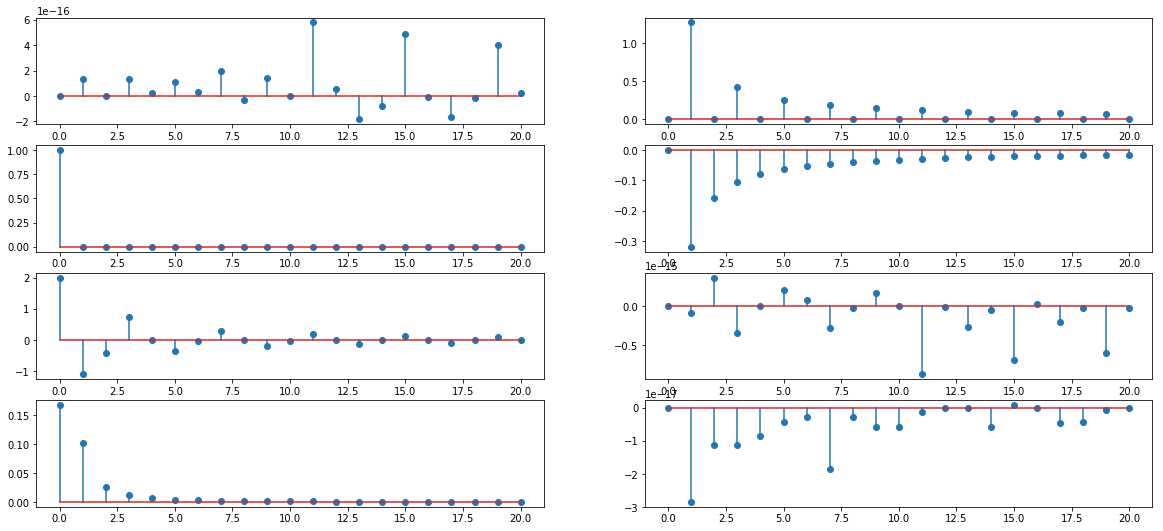

In [51]:
plt.figure(figsize=(20, 9))
t_period = np.arange(0, 1, 1/Fs)

F1 = fourier_series(func1(t_period), 20)
plt.subplot(421); plt.stem(F1[:,0])
plt.subplot(422); plt.stem(F1[:,1])

F2 = fourier_series(func2(t_period), 20)
plt.subplot(423); plt.stem(F2[:,0])
plt.subplot(424); plt.stem(F2[:,1])

F3 = fourier_series(func3(t_period), 20)
plt.subplot(425); plt.stem(F3[:,0])
plt.subplot(426); plt.stem(F3[:,1])

F4 = fourier_series(func4(t_period), 20)
plt.subplot(427); plt.stem(F4[:,0])
plt.subplot(428); plt.stem(F4[:,1])

In [53]:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

array([ 0.,  1.,  1., ..., -1., -1., -1.])

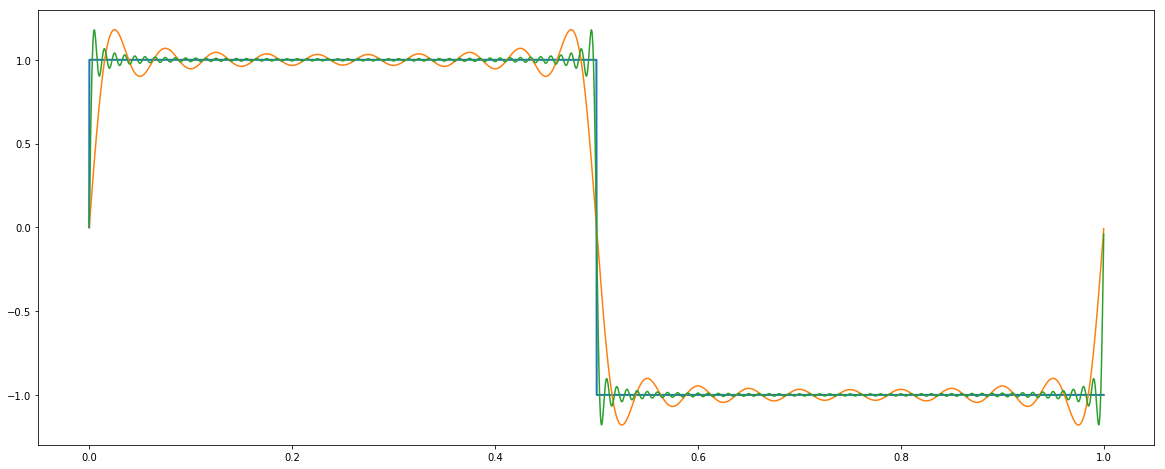

In [63]:
plt.figure(figsize=(20, 8))

F = fourier_series(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics');